
https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("../DATA/DATA/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


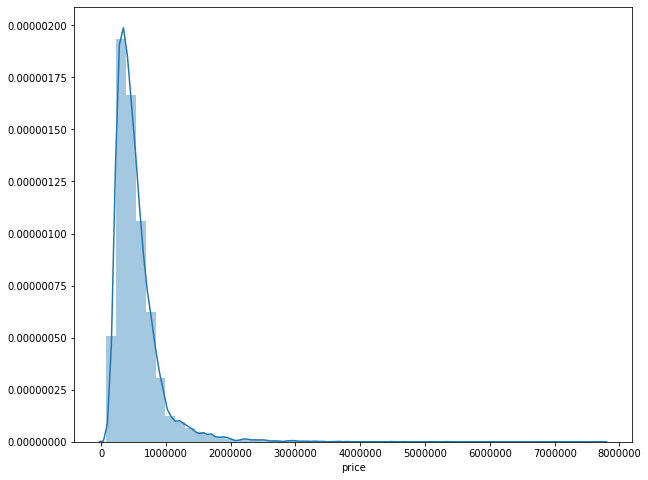

In [7]:
plt.figure(figsize=(10,8))
sns.distplot(df["price"])

Genellikle ev fiyatlarının 3 milyona kadar olduğu görülüyor. daha fazlası outlier oluyor.

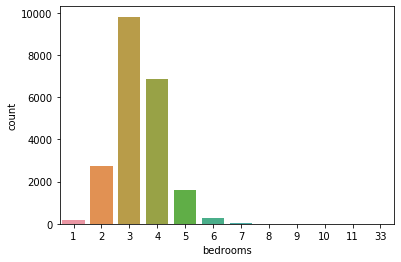

In [8]:
sns.countplot(df["bedrooms"])

In [9]:
df.corr()["price"].sort_values() #fiyatla corelasyonlarına bakıyoruz

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

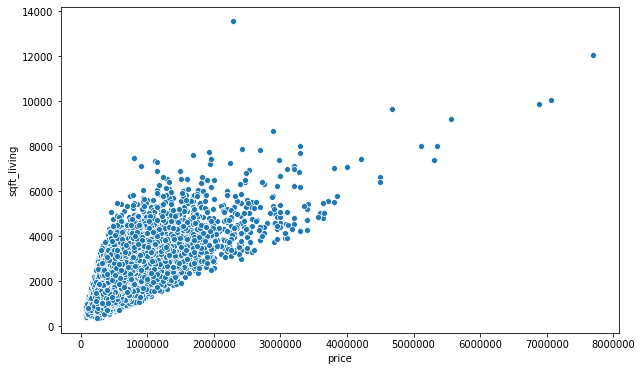

In [10]:
# korelasyonu yüksek olan sütunları scatter plot yapmayı öneriyor

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["price"],y=df["sqft_living"])

Aralarınca ciddi bir linear regresyon olduğu görünüyor. Diğer pozitif korelasyondakilerle dağılımı görmek için boxplot yapalım

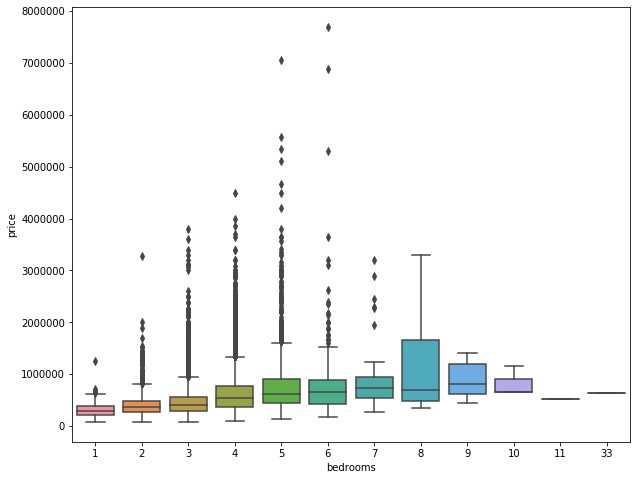

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(x="bedrooms",y="price",data=df)

3-7 arasındaki yatak odası sayısında ciddi çeşitlilik olduğu görülüyor. Yuakarıdaki yatak odası sayısı grafiğinde de öyle görünüyordu.

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

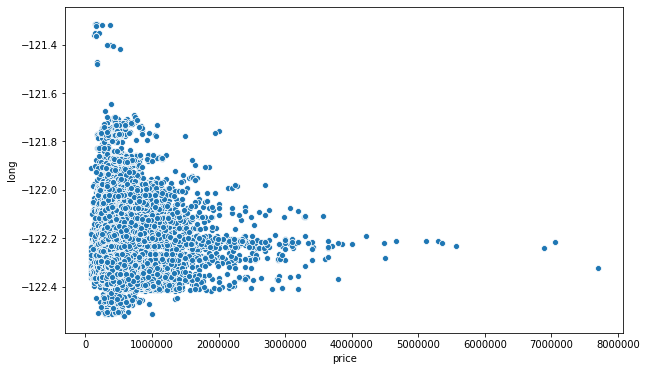

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="long",data=df)

Buradan da anlaşılacağı üzere -122.0 boylamında en pahalı evlerin olduğunu görüyoruz. Bunu enlem için de baktığımızda en pahalı evlerin olduğu bölgeyi görebileceğiz.

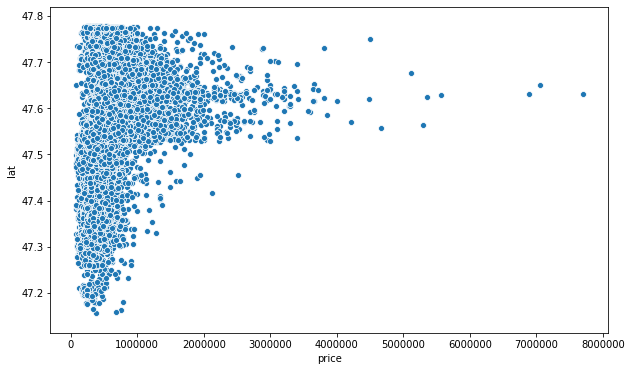

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="lat", data=df)

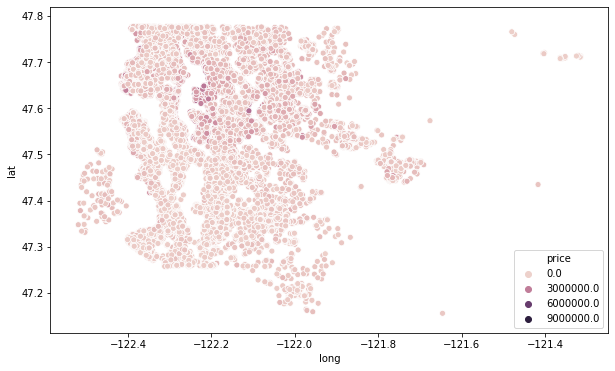

In [15]:
# Şimdi bu long ve lat değerlerini scatter plotta inceleyelim ve bölge haritasının çıktığını görelim
# Aynı zamanda en pahalı evlerin olduğu yeri de göreceğiz.

plt.figure(figsize=(10,6))
sns.scatterplot(x="long",y="lat",data=df,hue="price")

İstediğimiz renk scalasını yakalayamadık çünkü çok pahalı evler outlier olarak çalıştı grafikte renk skalasını bozdu. Bunu aşmak için bu pahalı evlerin oranını bulupp onlar ihmal edilebilecek düzeyde ise onları silerek devam edeceğiz plota

In [16]:
# böyle bakarız en pahalı evlere;

df.sort_values("price", ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


Evlerin distplotla bakılan fiyat grafiğinde yaklaşık en pahalı evin 3 milyon olduğu onun üzerindekilerin outlier olduğunu görmüştük. Yaklaşık 20 ev çok pahalı (outlier)

In [17]:
len(df)*0.01 #toplam ev sayısının yüzde biri bu kadar ev ediyormuş

215.97

In [18]:
# pahalı evleri hesaplamadan çıkarıyoruz yani yüzde birini siliyoruz.
non_top_1_perc = df.sort_values("price", ascending=False).iloc[216:]

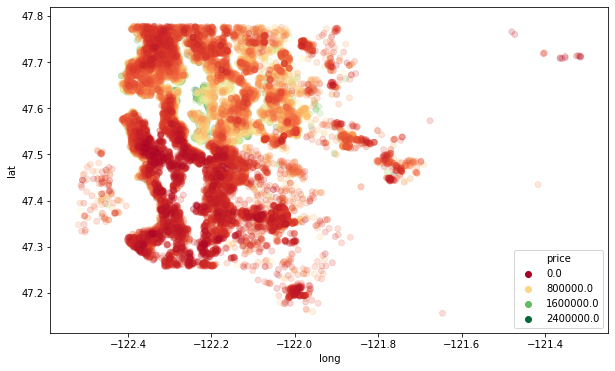

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="long",y="lat",data=non_top_1_perc,hue="price",edgecolor=None,alpha=0.2,palette="RdYlGn")

Şimdi daha net bir grafik elde ettik. Yeşil bölgenin pahalı olduğunu gömüş olduk. Genelde su kenarındaki evler pahalı. Bunu da görelim

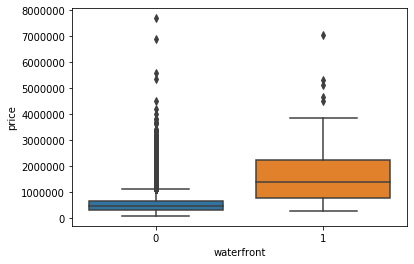

In [20]:
sns.boxplot(x="waterfront",y="price",data=df)

In [21]:
df= df.drop("id",axis=1) #id sütununu düştük

In [22]:
df["date"]

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [23]:
# date sütununun string olduğunu gördük. bunu tarihe çevirip ay ve yıl olarak ayıracağız

df["date"]=pd.to_datetime(df["date"])

In [24]:
df["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
# tam tarih olarak faydalı omayabilir onun için yıl ve aya böleceğiz.

df["year"]=df["date"].apply(lambda date:date.year)

In [26]:
df["month"] = df["date"].apply(lambda date:date.month)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


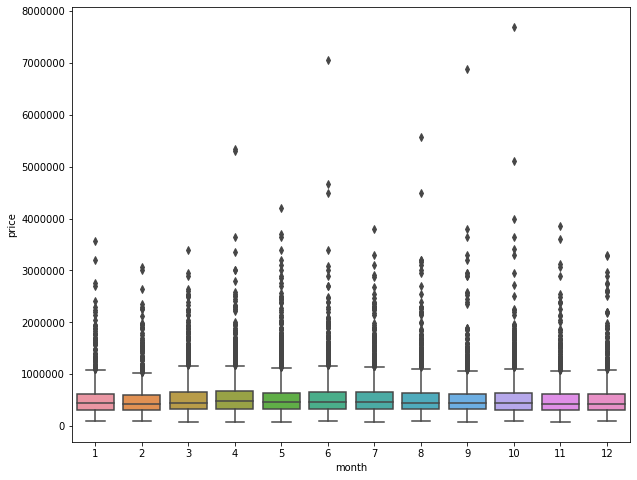

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(x="month",y="price",data=df)

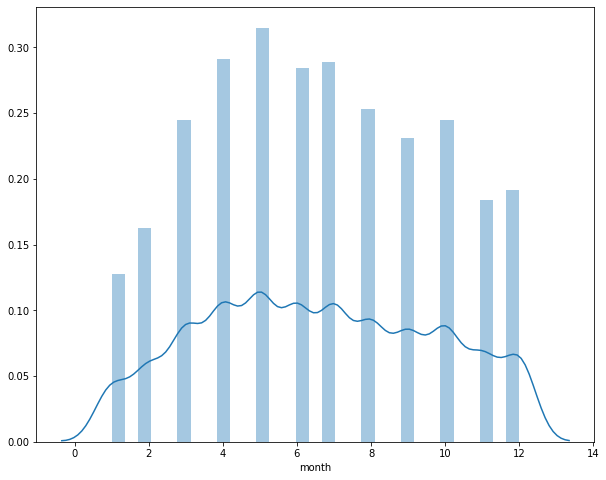

In [29]:
# en fazla satış olan aya bakıyoruz
plt.figure(figsize=(10,8))
sns.distplot(df["month"])

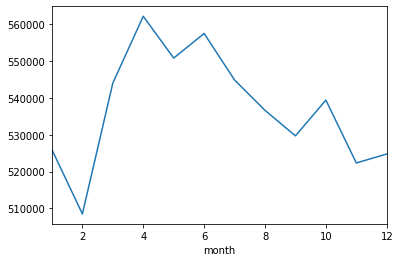

In [30]:
# aylardaki fiyatların ortalamasını alıp grupluyoruz ve fiyatın aylara göre dağılımına bakıyoruz

df.groupby("month").mean()["price"].plot()

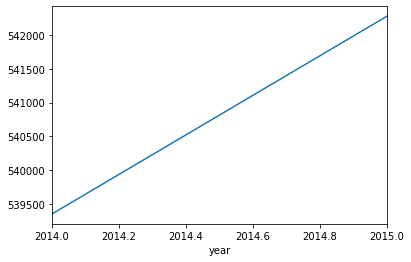

In [31]:
# fiyatların yıllara göre değişimine bakalım: sürekli artmış

df.groupby("year").mean()["price"].plot()

In [32]:
# tarihi silebiliriz

df.drop("date",axis=1,inplace=True)

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [35]:
# zipcode sütununu modelimiz continuous value olarak algılayabilir. Bunu düzeltmemiz lazım. Possta kodu sabit terim aslında
# diğer türlü hangisi yüksek hangisi düşük gibi kıyasa girer. onun için kategorical value olarak değerlendireceğiz

df["zipcode"].value_counts() #posta kodlarından kaçar tane tekil kod var sayılarına bakıyoruz

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [36]:
# 70 tane farklı zipcode varmış (üstteki sonuç)
# zipcode üzerinde çalışma yapılıp aslında pahalı-ucuz olan posta kodları, 
# ya da kuzey-orta-güney zipcodeları gibi inceleme yapılabilir. 
# ancak bu çok zamana alır ve araştırma yaptığımız yerle ilgili uzmanlık gerektirir
# bu yüzden zipcodu siliyoruz

df.drop("zipcode",axis=1,inplace=True)

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [38]:
df["yr_renovated"].value_counts() #yenilenme tarihlerini inceliyoruz

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Yenilenme tarihi 0 olanlar yenilenmemiş anlamına gelir. ama 0 olması bizim inceleme yaparken hatalı sonuç almamıza neden olur. Onun için bu sütunla çalışırken düzeltme gerekir.
Bunu yaparken de yenilenmiş/yenilenmemiş şeklinde yapabiliriz
Ancak dikkat etmemiz gerken diğer şey de yeni tarihli yenilenmiş evlerin eski tarihlilere ve hiç yenilenmemişlere göre daha pahalı olacağı gerçeğidir.

In [39]:
df["sqft_basement"].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

Aynı durum bodrum kat için de geçerliymiş onu görüyoruz üstteki sonuçtan. Ayrıca bodrum kat ve yenilenme sütunlarının categorical değil continuous olduğunu gördük.

In [40]:
# Veriyi bölerken numpy array olacak şekilde bölüyoruz
X = df.drop("price",axis=1).values
y= df["price"].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.fit_transform(X_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
X_train.shape

(15117, 19)

In [49]:
# Şimdi modeli oluşturuyoruz.
# Modeli oluştururken shapeine baktık ve 19 sütun olduğunu gördük.
# Bu nedenle 19 nöron ekleyerek başlıyoruz modele
# İlerleyen zamanda early stopping olayını öğreneceğiz ve böylece layer sayısının kaç olması gerektiği
# Kaç epoch gidilmesi gerektiği gibi değerleri kendisi otomatik belirleyecek

model = Sequential()

model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))

# bu model overfitting olabilir ve overkill olabilir. 
# Bunun olup olmadığını training sırasında validation data kullanarak anlayabiliriz.

model.add(Dense(1)) # output layer; price tahiminini verir

model.compile(optimizer="adam", loss="mse")

**validation data :** training data üzerinde train ederken her epoch sonraso hızlıca test datayı run eder ve loss değerine bakarız. Ancak bu kontrol bizim w-b değerlerimizin optimize edilmesinde kullanılmaz sadece kontrol amaçlıdır.

**batch_size:** veri seti büyük olduğu için veriyi batchlere bölüyoruz. Batch_size ın 2nin üstleri (64-128-254 vb) olarak seçilmesi genelde tercih edilir. çok küçük seçilirse training çok uzun sürer. Batchlere bölerek modeli çalıştırdığımızda her batchte w-b değerlerini optimize etmeye çalışır. diğer türlü tüm modeli gidip sonra w-b optimize edip tekrar tüm seti bir daha gitmesi gerekir. batchlere böldüğümüzde her batchte optimize ederek gider.

In [50]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 65us/sample - loss: 430233651484.3654 - val_loss: 418887520326.7950
Epoch 2/400
15117/15117 [==============================] - 0s 26us/sample - loss: 428687574781.3751 - val_loss: 413814706165.8864
Epoch 3/400
15117/15117 [==============================] - 0s 26us/sample - loss: 407038992023.6322 - val_loss: 366862064551.5062
Epoch 4/400
15117/15117 [==============================] - 0s 25us/sample - loss: 303317938284.6522 - val_loss: 214621038748.7605
Epoch 5/400
15117/15117 [==============================] - 0s 24us/sample - loss: 141718826901.6508 - val_loss: 102490012897.0272
Epoch 6/400
15117/15117 [==============================] - 0s 25us/sample - loss: 99509453779.2250 - val_loss: 95667633498.3901
Epoch 7/400
15117/15117 [==============================] - 0s 26us/sample - loss: 97013215342.6844 - val_loss: 93686733947.8914
Epoch 8/400
15117/15117 [====================

In [51]:
model.history.history # sonuç olarak bir tuple verdi

{'loss': [430233651484.3654,
  428687574781.3751,
  407038992023.6322,
  303317938284.6522,
  141718826901.65085,
  99509453779.22498,
  97013215342.6844,
  95138817452.4448,
  93221678916.77132,
  91191532642.42377,
  89169128604.67871,
  87130414358.60767,
  84947709317.15659,
  82659798484.27492,
  80220426901.93875,
  77610415070.33406,
  75025341864.92241,
  72302126734.28432,
  69552107168.3027,
  66769323639.7952,
  63999644826.91751,
  61353770885.12271,
  58889793866.83389,
  56704693910.006485,
  54855660499.63141,
  53254094351.816895,
  51947375355.41073,
  50795171716.17437,
  49878196197.58206,
  49033154080.00635,
  48339113753.21558,
  47695049354.96514,
  47063932478.48859,
  46516309676.12304,
  45992068859.613945,
  45431871992.10849,
  44902728659.0895,
  44431478946.842896,
  43978741391.097176,
  43541733708.86604,
  43084783601.504005,
  42679648067.41655,
  42277559805.18886,
  41857829105.89349,
  41563453780.994644,
  41254430488.47047,
  40956328545.577034,
 

In [52]:
# bunu dataframe olarak incelediğimizde 
# train loss ve validation loss değerlerini görebiliriz.
# training loss ve validation loss değerlerini görebiliyoruz. Bu sayede training sette overifitting olup olmadığını kontrol etmek yerine,
#test yani validation loss ile training loss değerini doğrudan karşılaştırabiliriz.

pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302337e+11,4.188875e+11
1,4.286876e+11,4.138147e+11
2,4.070390e+11,3.668621e+11
3,3.033179e+11,2.146210e+11
4,1.417188e+11,1.024900e+11
...,...,...
395,2.881871e+10,3.382860e+10
396,2.882078e+10,3.490621e+10
397,2.881159e+10,3.669129e+10
398,2.878424e+10,3.362049e+10


In [53]:
losses=pd.DataFrame(model.history.history)

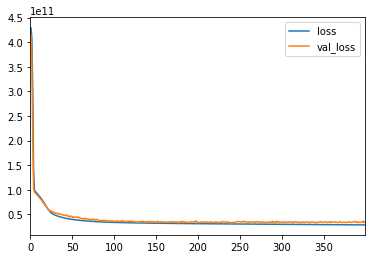

In [54]:
losses.plot()

**Overfitting :** eğer grafikte validation loss değeri bir yerde sonra yükselmeye başlarsa bu training setin overfit olduğunu gösterir çünkü validation loss  training losstan çok daha yüksektir.

Bir yere kadar düştüğünü sonra düşüşün durduğunu görebiliyoruz. Bu da overfitting olmadığını gösteriyor bize. İstenen görüntü bu.

In [55]:
# Şimdi test datada bazı ölçümler (evaluation) yapalım

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [56]:
predictions = model.predict(X_test)

In [57]:
predictions

array([[351859.56],
       [518258.5 ],
       [482425.94],
       ...,
       [323829.94],
       [510933.56],
       [576997.  ]], dtype=float32)

In [58]:
# Şimdi bu sonuçlarla gerçek değerleri karşılaştıralım

mean_squared_error(y_test,predictions)

34539125396.49897

Bu sonuç çok büyük. Çünkü error değerinin karesini aldık. şimdi karekökünü alalım (root mean squared error)

In [59]:
np.sqrt(mean_squared_error(y_test,predictions))

185847.04839329293

In [60]:
mean_absolute_error(y_test,predictions)

114069.86130823207

Şimdi bu sonuca göre hata payı 116372 dolar. bu iyi mi kötü mü bunun için datayı tekrar incelemek gerekir.

In [61]:
df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [62]:
# Buradaki mean değerinin kaça tekabül ettiğine bakalım

5.402966e+05

540296.6

540296 dolar çıktı ortalama fiyat. Yani bizim hata payımız yüzde 20si kadar. ne çok kötü ne çok iyi. Neler olduğunu anlamak için evaluation işlemimizi biraz derinleştirelim.

**explain variance score :** modelin varyansını hesaplar. 1.0 en iyi skordur.

In [63]:
explained_variance_score(y_test,predictions)

0.7839086916324234

Aslında 0.77 kötü değil hatta iyi sayılır. Kaldı ki modeli biraz daha devam ettirebilirdik çünkü hala overfittinge girmemişti. Overfittinge girene kadar devam edebiliriz, ya da tahminimizi ve gerçek değerimizi plotlayarak neler olduğunu anlamaya çalışabiliriz.

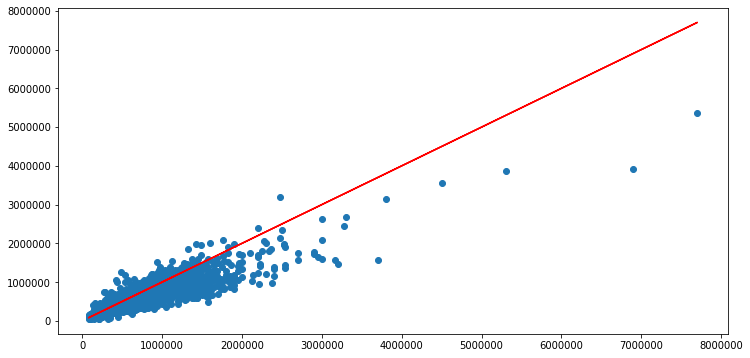

In [64]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,"r") # mükemmel çizgiyi görmek için yaptık

Grafiğe göre aslında tahminlerin iyi olduğunu ancak yüksek fiyatlı evlerde tahminlerin yanılma payının arttığını (outliers) görebiliriz. 200000000 dolara kadar olan evlerde tahminlerin iyi olduğunu görüyoruz. Bunu düzeltmek için pahalı olan o yüzde 1 lik evleri hesaba katmayıp 3 milyona kadar olan yaklaşık yüzde 99luk veriyle modeli deneyebilir ve bunun üzerindeki fiyatların tahmin oranının düşük olduğunu söyleyebiliriz.

In [65]:
# Şimdi yeni veri ile ev fiyatı tahmini yapalım. Bunun için özeliklerin ne olduğunu görelim önce

df.drop("price",axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [66]:
single_house = df.drop("price",axis=1).iloc[0]

In [67]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [68]:
#single_house.values.reshape(-1,19) 

# reshape(-1,19): -1 yazınca sütunda olan verilerin hepsini satıra çeker. 
# yani ilave bir köşeli paranteze alır ve böylece 19'a 1'lik olan matris şekil değiştirerek 1'e 19 olur.

In [69]:
# şimdi scale edeceğiz.

single_house=scaler.transform(single_house.values.reshape(-1,19) )
# (-1,19 deyince sütunu satır yapar ve çift paranteze alır)

In [70]:
single_house

array([[0.0625    , 0.06666667, 0.05792683, 0.00516884, 0.        ,
        0.        , 0.        , 0.5       , 0.33333333, 0.08453838,
        0.        , 0.47826087, 0.        , 0.56720299, 0.215     ,
        0.13926499, 0.00574235, 0.        , 0.81818182]])

In [71]:
model.predict(single_house)

array([[241709.88]], dtype=float32)

In [72]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


Biz modeli çalıştırdığımızda çıkan sonuç 238447 dolar. gerçek sonuç ise 221900 dolar. Bu gayet başarılı bir tahmin oldu. Şimdi yüzde 1lik pahalı evleri setten çıkarıp deneyelim.

In [101]:
perc_99 = df.sort_values("price",ascending=False).iloc[216:]

In [102]:
perc_99.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,47.7165,-122.259,2630,13868,2015,4


In [103]:
X2 = perc_99.drop("price",axis=1).values
X2

array([[4.0000e+00, 3.5000e+00, 4.3700e+03, ..., 1.0347e+04, 2.0140e+03,
        6.0000e+00],
       [5.0000e+00, 4.5000e+00, 6.2000e+03, ..., 1.4486e+04, 2.0140e+03,
        1.0000e+01],
       [3.0000e+00, 1.7500e+00, 3.3300e+03, ..., 1.6560e+04, 2.0150e+03,
        2.0000e+00],
       ...,
       [2.0000e+00, 1.0000e+00, 7.3000e+02, ..., 9.0000e+03, 2.0150e+03,
        3.0000e+00],
       [1.0000e+00, 7.5000e-01, 4.3000e+02, ..., 7.5000e+03, 2.0140e+03,
        5.0000e+00],
       [2.0000e+00, 1.0000e+00, 7.8000e+02, ..., 1.0387e+04, 2.0140e+03,
        5.0000e+00]])

In [104]:
y2 = perc_99["price"].values
y2

array([1970000., 1960000., 1960000., ...,   81000.,   80000.,   78000.])

In [105]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [106]:
scaler2 = MinMaxScaler()

In [107]:
X2_train = scaler2.fit_transform(X2_train)

In [108]:
X2_test = scaler2.fit_transform(X2_test)

In [109]:
X2.shape

(21381, 19)

In [110]:
model2 = Sequential()

model2.add(Dense(19,activation="relu"))
model2.add(Dense(19,activation="relu"))
model2.add(Dense(19,activation="relu"))
model2.add(Dense(19,activation="relu"))

model2.add(Dense(1))

model2.compile(loss="mse",optimizer="adam")

In [111]:
model2.fit(x=X2_train,y=y2_train,
          validation_data=(X2_test,y2_test),
          batch_size=128, epochs=400)

Train on 14966 samples, validate on 6415 samples
Epoch 1/400
14966/14966 [==============================] - 1s 66us/sample - loss: 346858741163.3623 - val_loss: 356765001530.3832
Epoch 2/400
14966/14966 [==============================] - 0s 26us/sample - loss: 345051039018.4557 - val_loss: 350354181158.7891
Epoch 3/400
14966/14966 [==============================] - 0s 24us/sample - loss: 322731413344.7141 - val_loss: 298119188026.0240
Epoch 4/400
14966/14966 [==============================] - 0s 25us/sample - loss: 227533007533.5860 - val_loss: 150315808820.0380
Epoch 5/400
14966/14966 [==============================] - 0s 26us/sample - loss: 91160222998.4765 - val_loss: 56616820876.7900
Epoch 6/400
14966/14966 [==============================] - 0s 25us/sample - loss: 54812907313.3663 - val_loss: 53678269460.2725
Epoch 7/400
14966/14966 [==============================] - 0s 24us/sample - loss: 53380234312.1165 - val_loss: 52780401317.1330
Epoch 8/400
14966/14966 [======================

In [112]:
loss2 = pd.DataFrame(model2.history.history)

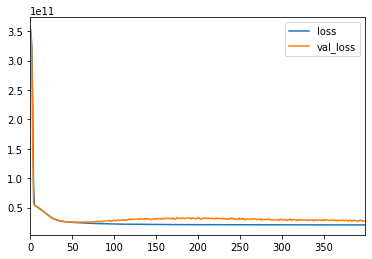

In [113]:
loss2.plot()

In [114]:
model2.history.history

{'loss': [346858741163.3623,
  345051039018.4557,
  322731413344.7142,
  227533007533.586,
  91160222998.47655,
  54812907313.366295,
  53380234312.11653,
  52447386200.74302,
  51507319141.43526,
  50539790517.72819,
  49560910719.230255,
  48557059189.001205,
  47524410421.232124,
  46488065174.11733,
  45412490983.19711,
  44320775965.93452,
  43201680698.329544,
  42078435348.52653,
  40930444354.91648,
  39794602282.318855,
  38665518199.1907,
  37532188991.66644,
  36442674657.27863,
  35364637401.102234,
  34351967646.22531,
  33369935875.55793,
  32464501739.336628,
  31638811484.198315,
  30883038711.720966,
  30184864946.307095,
  29590598117.52078,
  29005298310.72244,
  28511938174.374985,
  28078779353.273285,
  27687175573.193638,
  27339913089.00922,
  27025787276.5725,
  26747605820.176933,
  26511018830.78765,
  26277339207.158627,
  26057485256.578377,
  25863986839.280502,
  25698566238.9694,
  25567020078.116264,
  25423547961.953228,
  25248283759.253777,
  2515197

In [115]:
predictions2 = model2.predict(X2_test)

In [116]:
predictions2

array([[682434.44],
       [480735.03],
       [355633.03],
       ...,
       [366397.56],
       [420232.1 ],
       [562539.5 ]], dtype=float32)

In [117]:
mean_squared_error(y2_test,predictions2)

27255712482.79129

In [118]:
np.sqrt(mean_squared_error(y2_test,predictions2))

165093.0418969597

In [120]:
mean_absolute_error(y2_test,predictions2)

109491.88582180436

In [121]:
perc_99.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
count,2.138100e+04,21381.000000,21381.000000,21381.000000,2.138100e+04,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000
mean,5.183675e+05,3.363313,2.098592,2051.004256,1.498522e+04,1.490319,0.005332,0.216267,3.408634,7.627379,1766.488144,284.516112,1970.985221,82.329311,47.559500,-122.213741,1971.711613,12686.271222,2014.322857,6.574950
std,2.849428e+05,0.920045,0.745745,861.142315,4.097016e+04,0.538942,0.072826,0.729313,0.649342,1.133104,791.302258,430.493955,29.309309,396.926967,0.139035,0.141118,667.936407,27172.880068,0.467579,3.115617
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.469200,-122.329000,1480.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.576000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,47.570700,-122.230000,1830.000000,7600.000000,2014.000000,6.000000
75%,6.350000e+05,4.000000,2.500000,2520.000000,1.054500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,47.678400,-122.124000,2340.000000,10020.000000,2015.000000,9.000000
max,1.970000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,871200.000000,2015.000000,12.000000


In [123]:
5.183675e+05 # 518367 dolara karşın hata payımız 165093 dolar.diğer modelde 185000 dolardı. daha azaldığını görüyoruz.

518367.5

In [125]:
explained_variance_score(y2_test,predictions2)

0.7212251688015826

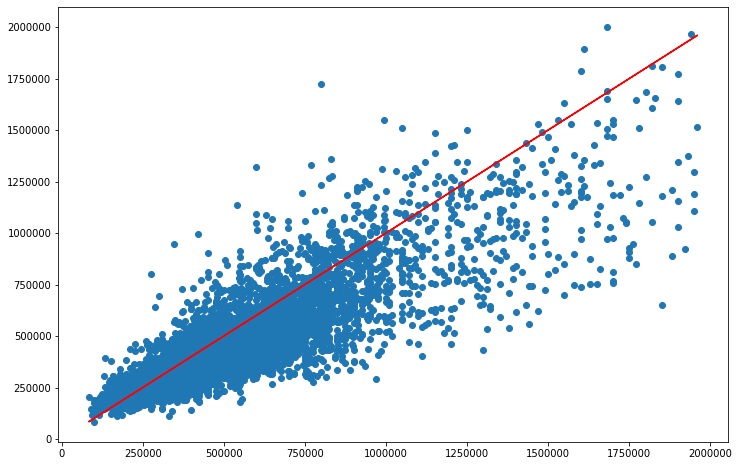

In [126]:
plt.figure(figsize=(12,8))
plt.scatter(y2_test,predictions2)
plt.plot(y2_test,y2_test,"r")

In [129]:
perc_99.iloc[0]

price            1.970000e+06
bedrooms         4.000000e+00
bathrooms        3.500000e+00
sqft_living      4.370000e+03
sqft_lot         8.510000e+03
floors           2.000000e+00
waterfront       0.000000e+00
view             1.000000e+00
condition        3.000000e+00
grade            1.000000e+01
sqft_above       3.610000e+03
sqft_basement    7.600000e+02
yr_built         2.003000e+03
yr_renovated     0.000000e+00
lat              4.758760e+01
long            -1.222040e+02
sqft_living15    2.960000e+03
sqft_lot15       1.034700e+04
year             2.014000e+03
month            6.000000e+00
Name: 6329, dtype: float64

In [127]:
single_house2 = perc_99.drop("price",axis=1).iloc[0]

In [131]:
single_house2 = scaler2.transform(single_house2.values.reshape(-1,19))

In [132]:
single_house2

array([[0.33333333, 0.48      , 0.54417952, 0.00476099, 0.4       ,
        0.        , 0.25      , 0.5       , 0.75      , 0.50731707,
        0.23312883, 0.89565217, 0.        , 0.68999837, 0.26162791,
        0.46904315, 0.01729954, 0.        , 0.45454545]])

In [133]:
model2.predict(single_house2)

array([[1063051.1]], dtype=float32)

In [134]:
perc_99.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
